<a href="https://colab.research.google.com/github/mnocerino23/NBA-Player-Classifier/blob/main/NBA_classifiers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The goal in this notebook is to build some intitial models to see which ML algorithms are performing best on the NBA salary dataset

In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Read in the training and testing data that we preprocessed and split in the previous Jupyter Notebook

In [2]:
nba_train = pd.read_csv('/content/drive/MyDrive/Data_Science_Projects/NBA/nba_train.csv')
nba_test = pd.read_csv('/content/drive/MyDrive/Data_Science_Projects/NBA/nba_test.csv')

In [3]:
nba_train.shape

(334, 52)

In [4]:
nba_test.shape

(59, 52)

# Break Players into 4 classes based on their salary
With some experimentation this was the best 4 class division I was able to find

1.   0-6 Million: Low Level
2.   6-12 Million: Average Level
3.   12-20 Million: Star Level
4.   20+ Million: Max Level



In [5]:
nba_train['class'] = ''
for index, row in nba_train.iterrows():
  if nba_train.at[index,'Salary'] <= 6:
    nba_train.at[index,'class'] = 'Low Level'
  elif nba_train.at[index,'Salary'] > 6 and nba_train.at[index,'Salary'] <= 12:
    nba_train.at[index,'class'] = 'Average Level'
  elif nba_train.at[index, 'Salary'] > 12 and nba_train.at[index,'Salary'] <= 20:
    nba_train.at[index,'class'] = 'Star Level'
  elif nba_train.at[index,'Salary']> 20:
    nba_train.at[index,'class'] = 'Max Level'

In [6]:
print(nba_train['class'].value_counts())

Low Level        178
Average Level     60
Max Level         52
Star Level        44
Name: class, dtype: int64


In [7]:
nba_test['class'] = ''
for index, row in nba_test.iterrows():
  if nba_test.at[index,'Salary'] <= 6:
    nba_test.at[index,'class'] = 'Low Level'
  elif nba_test.at[index,'Salary'] > 6 and nba_test.at[index,'Salary'] <= 12:
    nba_test.at[index,'class'] = 'Average Level'
  elif nba_test.at[index, 'Salary'] > 12 and nba_test.at[index,'Salary'] <= 20:
    nba_test.at[index,'class'] = 'Star Level'
  elif nba_test.at[index,'Salary'] > 20:
    nba_test.at[index,'class'] = 'Max Level'

In [9]:
print(nba_train['class'].value_counts())

Low Level        178
Average Level     60
Max Level         52
Star Level        44
Name: class, dtype: int64


In [10]:
print(nba_test['class'].value_counts())

Low Level        30
Star Level       11
Average Level    10
Max Level         8
Name: class, dtype: int64


In [11]:
nba_train = nba_train.drop(['Salary'], axis = 1)
nba_test = nba_test.drop(['Salary'], axis = 1)

In [12]:
#seperate the other features from the target feature class (which is a class rank based on the salary of the player)
nba_train_features = nba_train.drop(['class'], axis = 1)
nba_train_target = nba_train['class']

nba_test_features = nba_test.drop(['class'], axis = 1)
nba_test_target = nba_test['class']

In [13]:
print('Train:')
print('train_features dimensions: ', nba_train_features.shape)
print('train_target dimensions: ', nba_train_target.shape, '\n')


print('Test:')
print('test_features dimensions: ', nba_test_features.shape)
print('test_target dimensions: ', nba_test_target.shape)

Train:
train_features dimensions:  (334, 51)
train_target dimensions:  (334,) 

Test:
test_features dimensions:  (59, 51)
test_target dimensions:  (59,)


In [14]:
print(len(nba_train_features.columns))
print(nba_train_features.columns)

51
Index(['Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P',
       '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST',
       'STL', 'BLK', 'TOV', 'PF', 'PTS', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%',
       'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS',
       'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP', 'pos_C', 'pos_PF',
       'pos_PG', 'pos_SF', 'pos_SG'],
      dtype='object')


# Feature Selection
*   Determine the most relevant of the 51 features in the dataset for predicting player salary using SelectKBest in Scikit-Learn


In [15]:
from sklearn.feature_selection import SelectKBest, f_classif

In [16]:
top_features_ordered = []

In [17]:
best_features = SelectKBest(f_classif, k=40)
k_best_data = best_features.fit_transform(nba_train_features, nba_train_target)
mask = best_features.get_support()
new_features = nba_train_features.columns[mask]
for item in new_features:
  if item not in top_features_ordered:
    top_features_ordered.append(item)

In [18]:
count = 1
for item in top_features_ordered:
  print(count, '. ', item)
  count += 1

1 .  Age
2 .  G
3 .  GS
4 .  MP
5 .  FG
6 .  FGA
7 .  FG%
8 .  3P
9 .  3PA
10 .  2P
11 .  2PA
12 .  eFG%
13 .  FT
14 .  FTA
15 .  FT%
16 .  ORB
17 .  DRB
18 .  TRB
19 .  AST
20 .  STL
21 .  BLK
22 .  TOV
23 .  PF
24 .  PTS
25 .  PER
26 .  TS%
27 .  FTr
28 .  ORB%
29 .  DRB%
30 .  AST%
31 .  USG%
32 .  OWS
33 .  DWS
34 .  WS
35 .  WS/48
36 .  OBPM
37 .  DBPM
38 .  BPM
39 .  VORP
40 .  pos_PG


# K-Nearest-Neighbours Classifier

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier(n_neighbors=9, metric = 'manhattan')
cv = cross_val_score(knn, nba_train_features, nba_train_target, cv = 6)
print(cv)
print(cv.mean())

[0.75       0.58928571 0.625      0.57142857 0.70909091 0.72727273]
0.662012987012987


# Support Vector Machine Classifier

In [20]:
from sklearn import svm
from sklearn.svm import SVC

In [21]:
linear_boundary = svm.SVC()

In [22]:
cv = cross_val_score(linear_boundary, nba_train_features[top_features_ordered], nba_train_target, cv = 5)
print(cv)
print(cv.mean())

[0.71641791 0.67164179 0.59701493 0.71641791 0.66666667]
0.6736318407960199


# Naive Bayes Classifier

In [23]:
from sklearn.naive_bayes import GaussianNB

In [24]:
gnb = GaussianNB()
cv = cross_val_score(gnb, nba_train_features[top_features_ordered], nba_train_target, cv = 5)
print(cv)
print(cv.mean())

[0.59701493 0.62686567 0.53731343 0.65671642 0.75757576]
0.6350972410673903


# Decision Tree Classifier


In [25]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [30]:
dt = DecisionTreeClassifier()
cv = cross_val_score(dt, nba_train_features[top_features_ordered], nba_train_target, cv =5)
print(cv)
print(cv.mean())

[0.58208955 0.53731343 0.6119403  0.59701493 0.66666667]
0.599004975124378


# Random Forest Classifier

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
rf = RandomForestClassifier()
cv = cross_val_score(rf, nba_train_features[top_features_ordered], nba_train_target, cv = 5)
print(cv)
print(cv.mean())

[0.73134328 0.65671642 0.6119403  0.67164179 0.74242424]
0.6828132066938037


# Gradient Boost Classifier

In [35]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
cv = cross_val_score(gb, nba_train_features[top_features_ordered], nba_train_target, cv = 5)
print(cv)
print(cv.mean())

[0.7761194  0.71641791 0.65671642 0.70149254 0.72727273]
0.7156037991858888


# Neural Network Classifiers

In [36]:
#encode the target variable
train_target = pd.get_dummies(nba_train['class'])
test_target = pd.get_dummies(nba_test['class'])

In [37]:
print(train_target.shape)
print(test_target.shape)

(334, 4)
(59, 4)


In [38]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Dropout
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import seaborn as sns

In [49]:
tf.random.set_seed(5)

network = tf.keras.models.Sequential()
network.add(tf.keras.Input(shape=(51,)))
network.add(tf.keras.layers.Dense(20, activation='relu'))
network.add(tf.keras.layers.Dense(20, activation='relu'))
network.add(tf.keras.layers.Dense(4, activation='softmax'))

network.compile(
   loss=tf.keras.losses.CategoricalCrossentropy(),
   optimizer=tf.keras.optimizers.Adam(),
   metrics="accuracy")

history = network.fit(nba_train_features, train_target, epochs= 55,validation_data=(nba_test_features, test_target))

Epoch 1/55
11/11 [==============================] - 1s 62ms/step - loss: 8.8155 - accuracy: 0.4491 - val_loss: 5.9712 - val_accuracy: 0.2542
Epoch 2/55
11/11 [==============================] - 0s 6ms/step - loss: 3.8890 - accuracy: 0.3174 - val_loss: 2.7998 - val_accuracy: 0.2881
Epoch 3/55
11/11 [==============================] - 0s 12ms/step - loss: 2.2759 - accuracy: 0.3563 - val_loss: 1.8345 - val_accuracy: 0.4237
Epoch 4/55
11/11 [==============================] - 0s 8ms/step - loss: 1.6296 - accuracy: 0.5269 - val_loss: 1.3588 - val_accuracy: 0.4746
Epoch 5/55
11/11 [==============================] - 0s 16ms/step - loss: 1.3554 - accuracy: 0.5778 - val_loss: 1.2034 - val_accuracy: 0.5085
Epoch 6/55
11/11 [==============================] - 0s 18ms/step - loss: 1.2157 - accuracy: 0.5898 - val_loss: 1.0682 - val_accuracy: 0.5593
Epoch 7/55
11/11 [==============================] - 0s 8ms/step - loss: 1.1373 - accuracy: 0.6018 - val_loss: 1.0746 - val_accuracy: 0.5424
Epoch 8/55
11/11

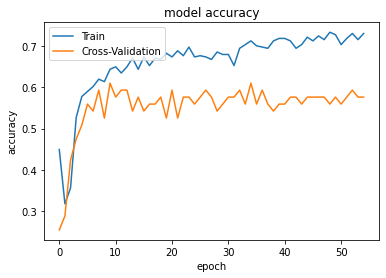

In [50]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='upper left')
plt.show()

# Takeaways
1.   Best Peforming Classifiers on the NBA dataset: Neural Network, Gradient Boosting, Random Forest, KNN
2.   Decision Trees struggled to perform well on this data
3.   The optimal number of features selected varies from algorithm to algorithm. For example, KNN performed best with many features. Gradient Boosting and Random Forest performed best with slightly less features than KNN
